# Filtrado Colaborativo basado en objetos

id_exp2  6526  6528  6530  6536  6541  6542  6543  6545  6547  6548  ...   \
id_exp1                                                              ...    
6526      1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
6528      NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
6530      NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
6536      NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...    
6541      NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  ...    

id_exp2  7951  7952  7953  7954  7955  7956  7957  7958  7959  7960  
id_exp1                                                              
6526      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6528      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6530      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6536      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6541      NaN   NaN   NaN   NaN   NaN   

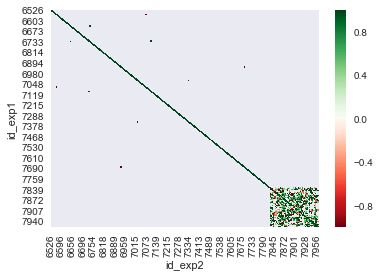

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from db.AdminMachineLearning import AdminMachineLearning
mldao = AdminMachineLearning()
corr = mldao.getMachineLearning().getCorrelations()
mldao.closeConnection()
print (corr.head())

cmaps['test'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']
top = cm.get_cmap('Reds_r', 128)
bottom = cm.get_cmap('Greens', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='Red-Green')
p1 = sns.heatmap(corr,vmin=-1, vmax=1, cmap = newcmp, annot = False)

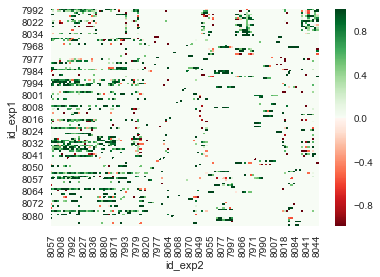

In [91]:
import scipy
import scipy.cluster.hierarchy as sch
df = corr.replace (np.nan,0)

cluster_th = 2

X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df = df.reindex_axis(columns, axis=1)

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex_axis(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex_axis(columns, axis=1)

p1 = sns.heatmap(df,vmin=-1, vmax=1, cmap = newcmp, annot = False)